# 用 Keras 做個手寫辨識系統

CNN 的創始者 Yann LeCun 第一個 CNN 例子就是用來辨識手寫、印刷的 0-9 數字。這裡用 LeCun 原版資料:

[MNIST 手寫辨識資料](http://yann.lecun.com/exdb/mnist/)

每個手寫圖檔都是 28x28 大小的, 輸出原本是 0-9 的數字, 但我們想改成辨視資料是 0 就要輸出

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

是 3 就是

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

等等。

另外我們用最傳統的 Fully Connected Feedforward 架構, 而不是用 CNN:

* 輸入是一個 28x28=784 維的向量。
* 輸出是 10 維向量 (每個數字都是 0 到 9)
* Hidden Layer 有兩層, 每層 500 個 neuron

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn 畫圖會比較漂亮, 但這裡可能不用
# import seaborn as sns
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.datasets import mnist
from keras.optimizers import SGD

Using Theano backend.


## 讀入 MNIST 資料

In [2]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

每一個 `x0_train` 裡都是 28x28 的矩陣, 我們可以畫出來看看就知道的確是個手寫的數字。

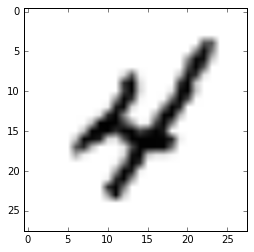

In [3]:
plt.imshow(x0_train[9], cmap='Greys')

相對的 y0_train 也可以看一下。

In [4]:
y0_train[9]

4

## 資料轉成可訓練的樣子

我們準備做兩件事:

* 把 x 影像資料從 28x28 的矩陣轉成 784 維的向量。
* 每個 y 轉成 10 維的向量, 只有在第 i 個位置是 1 (辨視出是 i), 其餘都是 0。

計算訓練、測試數目。

In [5]:
num_train = len(x0_train)
num_test = len(x0_test)

看一下多少個。

In [6]:
print("訓練資料 "+str(num_train)+" 筆")
print("測試資料 "+str(num_test)+" 筆")

訓練資料 60000 筆
測試資料 10000 筆


### 輸入資料轉向量

In [7]:
x_train = x0_train.reshape(num_train, 28*28) # 注意 28*28 只是個數字
x_test = x0_test.reshape(num_test, 28*28)

### 輸出資料轉向量

In [8]:
y_train = np.zeros((num_train, 10))
y_test = np.zeros((num_test,10))

In [9]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
for i in range(num_train):
    y_train[i][y0_train[i]] = 1
for i in range(num_test):
    y_test[i][y0_test[i]] = 1

## 建置我們的神經網路

In [11]:
model = Sequential()

In [12]:
model.add(Dense(input_dim=28*28, output_dim=500))
model.add(Activation('sigmoid'))

In [13]:
model.add(Dense(output_dim=500))
model.add(Activation('sigmoid'))

In [14]:
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## 訓練開始!

In [16]:
model.fit(x_train, y_train, batch_size=100, nb_epoch=20)

Epoch 1/20
60000/60000 [==============================] - 14s - loss: 0.0815 - acc: 0.3736    
Epoch 2/20
60000/60000 [==============================] - 14s - loss: 0.0615 - acc: 0.6576    
Epoch 3/20
60000/60000 [==============================] - 15s - loss: 0.0441 - acc: 0.7716    
Epoch 4/20
60000/60000 [==============================] - 15s - loss: 0.0323 - acc: 0.8389    
Epoch 5/20
60000/60000 [==============================] - 15s - loss: 0.0252 - acc: 0.8753    
Epoch 6/20
60000/60000 [==============================] - 15s - loss: 0.0210 - acc: 0.8901    
Epoch 7/20
60000/60000 [==============================] - 15s - loss: 0.0185 - acc: 0.8982    
Epoch 8/20
60000/60000 [==============================] - 15s - loss: 0.0167 - acc: 0.9056    
Epoch 9/20
60000/60000 [==============================] - 15s - loss: 0.0154 - acc: 0.9113    
Epoch 10/20
60000/60000 [==============================] - 15s - loss: 0.0144 - acc: 0.9166    
Epoch 11/20
60000/60000 [========================

## 看看訓練成績

In [17]:
score = model.evaluate(x_test, y_test)

 9952/10000 [============================>.] - ETA: 0s

In [18]:
print("Total Loss on Testing Set:", score[0])
print("Accuracy of Testing Set:", score[1])

Total Loss on Testing Set: 0.0106894730295
Accuracy of Testing Set: 0.9333


看來還挺準的, 我們抽查幾個看看。

## 看看訓練成效

In [24]:
result = model.predict_classes(x_test)

 9984/10000 [============================>.] - ETA: 0s

指定要看第幾筆訓練資料 (0 到 9999):

In [25]:
no_test = 888

先看一下長像 (記得要用原來的 `x0_test` 才可以)

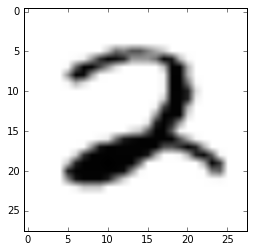

In [26]:
plt.imshow(x0_test[no_test], cmap="Greys")

In [29]:
nn_predict = result[no_test]
print('我們的神經網路說是:', nn_predict)

我們的神經網路說是: 2


## 把我們學好的成果存起來

我們日後要用這個神經網路, 在正常狀態下都不會想再訓練一次, 所以我們來學學怎麼把成果存起來。

In [30]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')